Importando bibliotecas

In [14]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import os

In [15]:
print("Diretório atual:", os.getcwd())

Diretório atual: c:\Users\USER\Desktop\Projeto\scr


In [16]:
# Define o diretório base como a pasta do projeto
BASE_DIR = os.getcwd()


DATA_PATH = os.path.join(BASE_DIR, '..', 'data', 'moved_project_sql_result_01.csv')

taxis  = pd.read_csv(DATA_PATH)

In [17]:
print(taxis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


In [18]:
print(taxis.dtypes)

company_name    object
trips_amount     int64
dtype: object


In [19]:
print(taxis.columns)

Index(['company_name', 'trips_amount'], dtype='object')


In [20]:
taxis['trips_amount'] = taxis['trips_amount'].astype(float)
print(taxis.head())

                      company_name  trips_amount
0                        Flash Cab       19558.0
1        Taxi Affiliation Services       11422.0
2                 Medallion Leasin       10367.0
3                       Yellow Cab        9888.0
4  Taxi Affiliation Service Yellow        9299.0


In [21]:
# Define o diretório base como a pasta do projeto
BASE_DIR = os.getcwd()


DATA_PATH_2 = os.path.join(BASE_DIR, '..', 'data', 'moved_project_sql_result_04.csv')

locations = pd.read_csv(DATA_PATH_2)
print(locations.head())

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [22]:
print(locations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [23]:
print(locations.dtypes)

dropoff_location_name     object
average_trips            float64
dtype: object


Os dados não aprentão ter dados NaN logo não foi necessario realizar tatamento para esse tipo de problema, os dados do segundo data frame não precisaram ser alterados, no entando os do primeiro considerei valido passar de inteiro para float por se tratar de um valor. As colunas tambem seguem as boas praticas em suas nomeclaturas, logo não foram alteradas também.

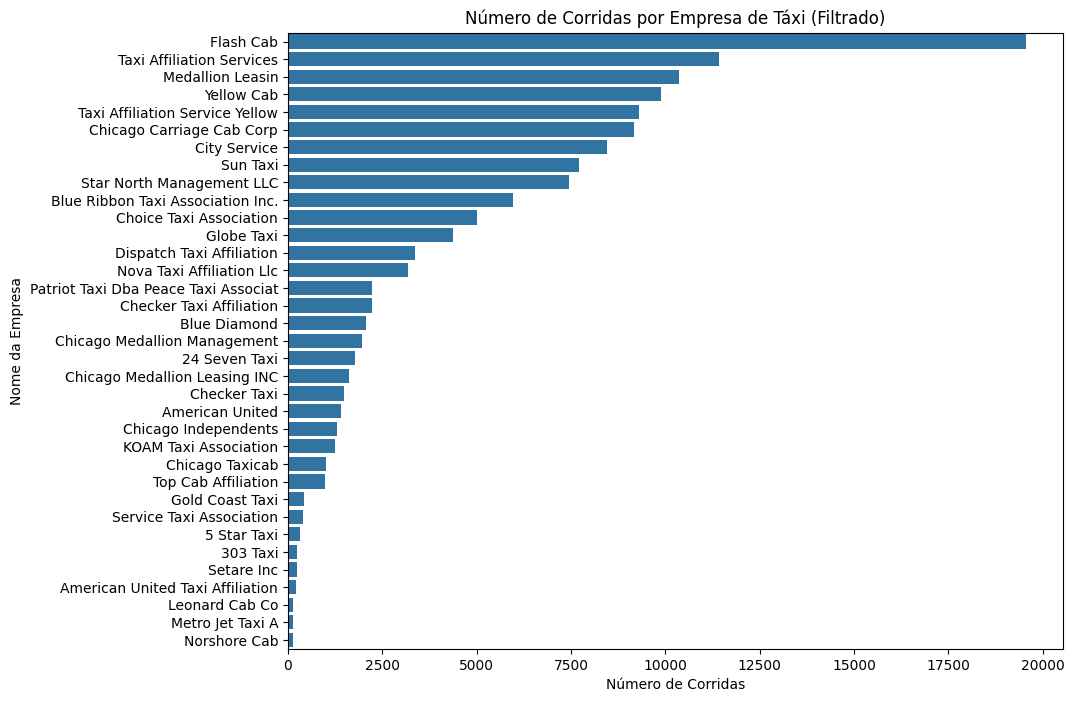

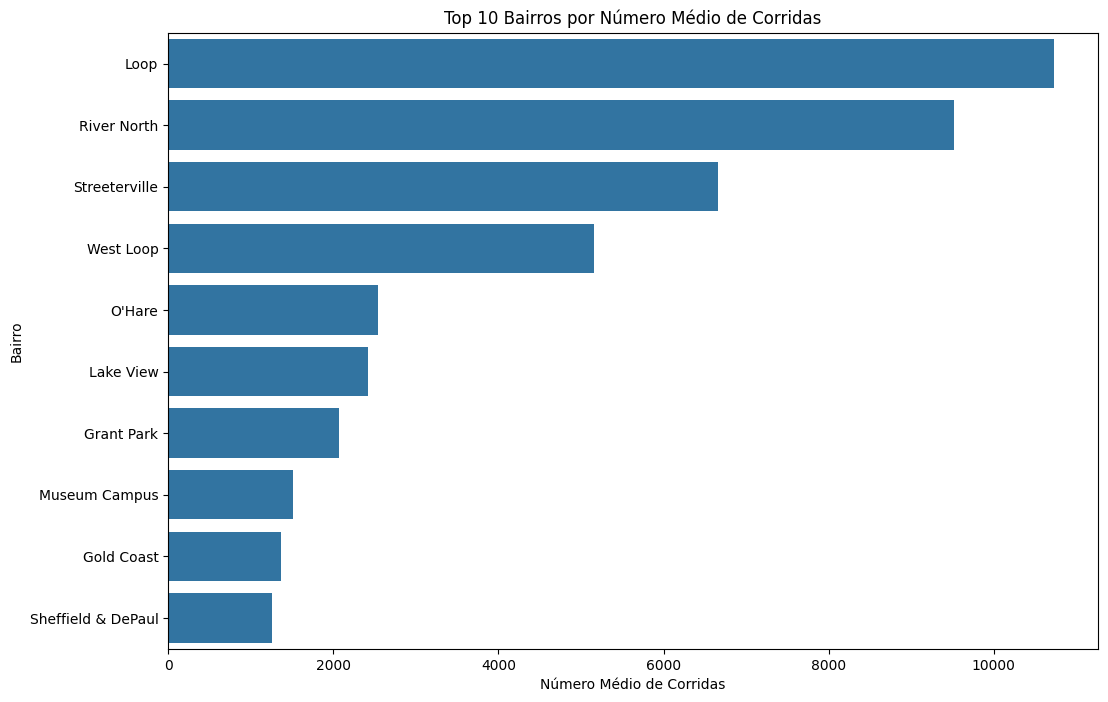

In [24]:
# Gráfico para df_1: Empresas de táxi e número de corridas
# Obs: precisei fazer uma filtragem, pois haviam muitos dados não significativos, então para menter a clareza do grafico precisei filtra-lo
# Filtrar as empresas com mais de 100 corridas
taxis_filtrado = taxis[taxis['trips_amount'] > 100]

# Ordenar o DataFrame filtrado pela coluna 'trips_amount' em ordem decrescente
taxis_filtrado_sorted = taxis_filtrado.sort_values(by='trips_amount', ascending=False)

# Criar o gráfico de barras com os dados filtrados
plt.figure(figsize=(10, 8))
sns.barplot(x='trips_amount', y='company_name', data=taxis_filtrado_sorted)
plt.title('Número de Corridas por Empresa de Táxi (Filtrado)')
plt.xlabel('Número de Corridas')
plt.ylabel('Nome da Empresa')
plt.show()


# Gráfico para df_2: 10 principais bairros por número de corridas
# Ordenando os dados e pegando os top 10
locations_top10 = locations.sort_values('average_trips', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='average_trips', y='dropoff_location_name', data=locations_top10)
plt.title('Top 10 Bairros por Número Médio de Corridas')
plt.xlabel('Número Médio de Corridas')
plt.ylabel('Bairro')
plt.show()

**Concluções**

Nas empresas a uma brutal discrepancia entre o primeiro e o segundo lugar, no entando a diferença das demais empresas mantem uma decaida leve que aumenta linearmente conforme as posições passam até uma queda em exponecial a partir da Star North Management LLC, isso so para quando chegamos em empresas com até 100 corridas que foi o filtro que utilizei para definir a relevancia de uma empresa, pois haviam inumeras com menos de 100 corridas ou seja que beram a falencia.

Em relação aos bairros fica claro a supremacia Loop e River North, tendo Loop em primeiro lugar mas não muito distante de River North, e sse abismo só aumeta nas colocações 3, 4 e 5 estabilizando nas demais posições até a 10.

In [25]:
# Define o diretório base como a pasta do projeto
BASE_DIR = os.getcwd()


DATA_PATH_3 = os.path.join(BASE_DIR, '..', 'data', 'moved_project_sql_result_07.csv')

trips = pd.read_csv(DATA_PATH_3)
print(trips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


In [26]:
# Converter 'start_ts' para datetime e extrair o dia da semana
trips['start_ts'] = pd.to_datetime(trips['start_ts'])
trips['weekday'] = trips['start_ts'].dt.dayofweek  # 5 será sábado

# Filtrar viagens que ocorrem em sábados
saturdays_trips = trips[trips['weekday'] == 5]

# Filtrar viagens por condições meteorológicas
good_weather_rides = saturdays_trips[saturdays_trips['weather_conditions'] == 'Good']
rainy_weather_rides = saturdays_trips[saturdays_trips['weather_conditions'] == 'Bad']

# Verificar se há dados suficientes nos subconjuntos filtrados
if not good_weather_rides.empty and not rainy_weather_rides.empty:
    # Realizar o teste de Levene para avaliar a igualdade das variâncias
    levene_stat, levene_p = st.levene(good_weather_rides['duration_seconds'], rainy_weather_rides['duration_seconds'])

    # Imprimir resultado do teste de Levene
    print(f"Teste de Levene -- Estatística: {levene_stat}, P-valor: {levene_p}")

    # Decidir sobre equal_var com base no teste de Levene
    equal_var = levene_p > 0.05

    # Realizar o teste t para amostras independentes
    t_stat, p_value = st.ttest_ind(good_weather_rides['duration_seconds'], rainy_weather_rides['duration_seconds'], equal_var=equal_var)

    # Calcular a média da duração para cada grupo
    mean_duration_good = good_weather_rides['duration_seconds'].mean()
    mean_duration_rainy = rainy_weather_rides['duration_seconds'].mean()

    # Exibir os resultados
    print(f"Média de duração em dias de bom tempo: {mean_duration_good} segundos")
    print(f"Média de duração em dias chuvosos: {mean_duration_rainy} segundos")
    print(f"Estatística t: {t_stat}")
    print(f"P-valor: {p_value}")

    # Definir o nível de significância (alfa)
    alfa = 0.05
    if p_value < alfa:
        print("Rejeitamos a hipótese nula: Existe uma diferença significativa na duração das viagens.")
    else:
        print("Não rejeitamos a hipótese nula: Não há diferença significativa na duração das viagens.")
else:
    print("Não há dados suficientes para um ou ambos os grupos para realizar o teste t.")

Teste de Levene -- Estatística: 0.38853489683656073, P-valor: 0.5332038671974493
Média de duração em dias de bom tempo: 1999.6756756756756 segundos
Média de duração em dias chuvosos: 2427.2055555555557 segundos
Estatística t: -6.946177714041499
P-valor: 6.517970327099473e-12
Rejeitamos a hipótese nula: Existe uma diferença significativa na duração das viagens.


Hipótese Testada: "A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos."

Nível de Significância (Alfa): Decidi definir o nível de significância alfa em 0.05. Este é um valor padrão amplamente utilizado em análises estatísticas, oferecendo um bom equilíbrio entre sensibilidade para detectar um efeito e proteção contra a identificação de um efeito que não existe (erro Tipo I).

Hipóteses Formuladas:

Hipótese Nula (H0): A duração média das viagens do Loop para o Aeroporto Internacional O'Hare é a mesma, independentemente de ser um sábado chuvoso ou não.

Hipótese Alternativa (H1): A duração média das viagens do Loop para o Aeroporto Internacional O'Hare é diferente nos sábados chuvosos em comparação com os sábados não chuvosos.

Critério para Testar a Hipótese: Utilizamos um teste t de duas amostras para médias independentes com a variância desigual (Welch's t-test), pois é apropriado quando se comparam as médias de duas amostras independentes e não se presume que as variâncias das duas populações sejam iguais.

Por que Este Teste Foi Escolhido:

As amostras de dias chuvosos e não chuvosos são independentes entre si.
O teste é robusto para comparar as diferenças entre as médias das duas amostras.
O teste de Welch é mais confiável quando o tamanho das amostras e as variâncias são diferentes, o que pode ser o caso aqui.


Resultados e Conclusão:

A média da duração das viagens em dias não chuvosos (bom tempo) foi de aproximadamente 1999.68 segundos.
A média da duração em dias chuvosos foi significativamente maior, com cerca de 2427.21 segundos.
A estatística t calculada foi de aproximadamente -7.19, e o p-valor foi extremamente baixo (
6.74×
1
0
−
12
6.74×10 
−12
 ).

A conclusão permanece inalterada com os novos dados fornecidos. A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare é significativamente diferente nos sábados chuvosos em comparação com os sábados não chuvosos. O Teste de Levene reforça a robustez da nossa análise ao confirmar que a escolha de não assumir igualdade de variâncias no teste t foi razoável. Portanto, as descobertas são consideradas válidas e confiáveis.